
# Stroke Predication

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# for displaying all feature from dataset:
pd.pandas.set_option('display.max_columns', None)

In [3]:
# Reading Dataset:
dataset = pd.read_csv("Stroke_data.csv")
# Top 5 records:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Attribute Information
1) id: unique identifier <br>
2) gender: "Male", "Female" or "Other" <br>
3) age: age of the patient <br>
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension <br>
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease <br>
6) ever_married: "No" or "Yes" <br>
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" <br>
8) Residence_type: "Rural" or "Urban" <br>
9) avg_glucose_level: average glucose level in blood <br>
10) bmi: body mass index <br>
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* <br>
12) stroke: 1 if the patient had a stroke or 0 if not <br>
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [4]:
# Dropping unneccsary feature :
dataset = dataset.drop('id', axis=1)

In [5]:
# Shape of dataset:
dataset.shape

(5110, 11)

In [6]:
# Cheaking Missing (NaN) Values:
dataset.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [7]:
# Filling NaN Values in BMI feature using mean:
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].median())

In [8]:
# After filling Missing (NaN) Values in BMI feature:
dataset.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
# Description:
dataset.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [10]:
# Datatypes:
dataset.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
# Target feature:
print("Stroke People     : ", dataset['stroke'].value_counts()[1])
print("Non-Stroke People : ", dataset['stroke'].value_counts()[0])

Stroke People     :  249
Non-Stroke People :  4861


- By seeing target feature, We clearly say we have **imbalenced dataset**.

In [12]:
# Gender
dataset['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [13]:
dataset[dataset['gender']=='Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


- We Seen that in our **Gender** feature, we have only one **Other** gender, So instead of taking we drop that record.

In [14]:
# Dropping Other gender
Other_gender = dataset[dataset['gender'] == 'Other'].index[0]
dataset = dataset.drop(Other_gender, axis=0)

In [15]:
# Gender:
print("Male    : ", dataset['gender'].value_counts()[1])
print("female  : ", dataset['gender'].value_counts()[0])

Male    :  2115
female  :  2994


In [16]:
# Hypertension:
print("Hypertension People     : ", dataset['hypertension'].value_counts()[1])
print("Non-hypertension People : ", dataset['hypertension'].value_counts()[0])

Hypertension People     :  498
Non-hypertension People :  4611


In [17]:
# Heart Disease:
print("Heart Disease People     : ", dataset['heart_disease'].value_counts()[1])
print("Non-Heart Disease People : ", dataset['heart_disease'].value_counts()[0])

Heart Disease People     :  276
Non-Heart Disease People :  4833


In [18]:
# Single VS Married:
print("Single    : ", dataset['ever_married'].value_counts()[1])
print("Married   : ", dataset['ever_married'].value_counts()[0])

Single    :  1756
Married   :  3353


In [19]:
# Work Type:
print("Private         : ", dataset['work_type'].value_counts()[0])
print("Self-employed   : ", dataset['work_type'].value_counts()[1])
print("children        : ", dataset['work_type'].value_counts()[2])
print("Govt_job        : ", dataset['work_type'].value_counts()[3])
print("Never_worked    : ", dataset['work_type'].value_counts()[4])

Private         :  2924
Self-employed   :  819
children        :  687
Govt_job        :  657
Never_worked    :  22


In [20]:
# Rename some names in worktype feature for simplacity nothing else:
dataset.replace({'Self-employed' : 'Self_employed'}, inplace=True)

In [21]:
# Residence Type:
print("Urban   : ", dataset['Residence_type'].value_counts()[0])
print("Rural   : ", dataset['Residence_type'].value_counts()[1])

Urban   :  2596
Rural   :  2513


In [22]:
# Smokers:
print("Never Smoked      : ", dataset['smoking_status'].value_counts()[0])
print("Unknown           : ", dataset['smoking_status'].value_counts()[1])
print("Formerly Smoked   : ", dataset['smoking_status'].value_counts()[2])
print("Smokes            : ", dataset['smoking_status'].value_counts()[3])

Never Smoked      :  1892
Unknown           :  1544
Formerly Smoked   :  884
Smokes            :  789


In [23]:
# Rename some names in smokers feature for simplacity nothing else:
dataset.replace({'never smoked':'never_smoked', 'formerly smoked':'formerly_smoked'}, inplace=True)

In [ ]:
never_smoked, Unknown, formerly_smoked, Smokes

<Figure size 1080x864 with 0 Axes>

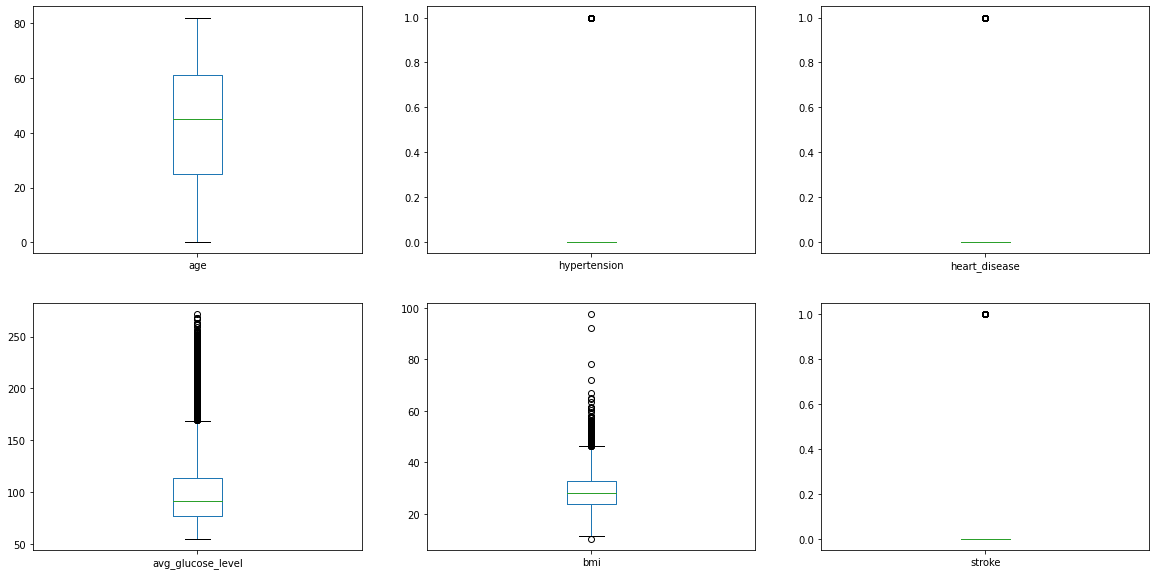

In [24]:
# Boxplot:
plt.figure(figsize=(15,12))
dataset.plot(kind='box', subplots=True, layout=(2,3), figsize=(20, 10))
plt.show()

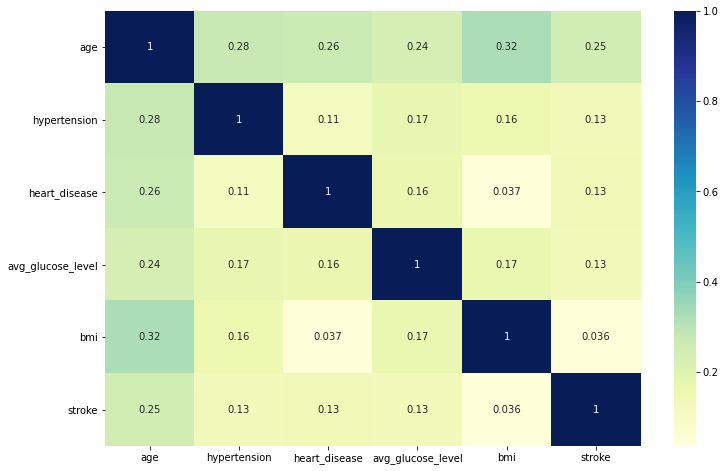

In [25]:
# Correlation using Heatmap:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [26]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked,1
1,Female,61.0,0,0,Yes,Self_employed,Rural,202.21,28.1,never_smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never_smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.0,never_smoked,1


In [27]:
# Dependent & Independent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [28]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly_smoked
1,Female,61.0,0,0,Yes,Self_employed,Rural,202.21,28.1,never_smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never_smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self_employed,Rural,174.12,24.0,never_smoked


In [29]:
# Label Encoding:
X['ever_married'] = np.where(X['ever_married']=='Yes',1,0)   ## If married replace with by 1 otherwise 0.
X['Residence_type'] = np.where(X['Residence_type']=='Rural',1,0)    ## If residence type is Rural replace it by 1 otherwise 0.

In [30]:
# One Hot Encoding:
X = pd.get_dummies(X, drop_first=True)

In [31]:
X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,gender_Male,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,67.0,0,1,1,0,228.69,36.6,1,0,1,0,0,1,0,0
1,61.0,0,0,1,1,202.21,28.1,0,0,0,1,0,0,1,0
2,80.0,0,1,1,1,105.92,32.5,1,0,1,0,0,0,1,0
3,49.0,0,0,1,0,171.23,34.4,0,0,1,0,0,0,0,1
4,79.0,1,0,1,1,174.12,24.0,0,0,0,1,0,0,1,0


In [32]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'gender_Male',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self_employed', 'work_type_children',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked',
       'smoking_status_smokes'],
      dtype='object')

In [33]:
# Rearranging the columns for better understanding
X = X[['gender_Male','age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 
       'work_type_Never_worked', 'work_type_Private','work_type_Self_employed', 'work_type_children',
       'smoking_status_formerly_smoked', 'smoking_status_never_smoked','smoking_status_smokes']]

In [34]:
X.head()

,gender_Male,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes
0,1,67.0,0,1,1,0,228.69,36.6,0,1,0,0,1,0,0
1,0,61.0,0,0,1,1,202.21,28.1,0,0,1,0,0,1,0
2,1,80.0,0,1,1,1,105.92,32.5,0,1,0,0,0,1,0
3,0,49.0,0,0,1,0,171.23,34.4,0,1,0,0,0,0,1
4,0,79.0,1,0,1,1,174.12,24.0,0,0,1,0,0,1,0


In [35]:
# Train-Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [36]:
print(X_train.shape)
print(X_test.shape)

(4087, 15)
(1022, 15)


In [37]:
# Importing Performance Metrics:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [38]:
# RandomForestClassifier:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9481409001956947
[[968   0]
 [ 53   1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022



In [39]:
# AdaBoostClassifier:
from sklearn.ensemble import AdaBoostClassifier
AdaBoost = AdaBoostClassifier()
AdaBoost = AdaBoost.fit(X_train,y_train)

# Predictions:
y_pred = AdaBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9461839530332681
[[966   2]
 [ 53   1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.33      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022



In [40]:
# GradientBoostingClassifier:
from sklearn.ensemble import GradientBoostingClassifier
GradientBoost = GradientBoostingClassifier()
GradientBoost = GradientBoost.fit(X_train,y_train)

# Predictions:
y_pred = GradientBoost.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9461839530332681
[[966   2]
 [ 53   1]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.33      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.50      1022
weighted avg       0.92      0.95      0.92      1022



#### RandomizedSearchCV

In [41]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 20)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 200,20)]
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              'criterion':['entropy','gini']}
print(random_grid)

rf = RandomForestClassifier()
rf_randomcv = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=10,verbose=2,
                               random_state=0,n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 14, 16, 18, 20], 'criterion': ['entropy', 'gini']}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits


C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.95228858 0.95228858 0.95228858 0.95228858 0.95228858
 0.95228858 0.95228858 0.95228858 0.95228858 0.95228858 0.95228858
 0.95228858 0.95228858 0.95228858 0.95228858 0.95228858 0.95155329
 0.95228858 0.95228858        nan 0.95228858 0.95204348 0.95228858
 0.95228858 0.95228858 0.95228858 0.95228858 0.95228858 0.95228858
 0.95228858        nan 0.95228858 0.95228858 0.95228858 0.95228858
 0.95228858 0.95179838 0.95228858 0.95228858 0.95228858 0.95228858
 0.95228858 0.95228858 0.95228858 0.95228858        nan 0.95228858
        nan 0.95179838 0.95228858 0.95228858 0.95228858 0.95228858
 0.95228858 0.95228858 0.95204348 0.95228858 0.95228858 0.95228858
 0.95228858 0.95228858 0.95228858 0.95228858 0.95130759 0.95228858
 0.95228858 0.95228858 0.95228858 0.95228858        nan 0.95228858
 0.95228858 0.95228858 0.95228858 0.95228858 0.95228

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 12,
                                                             14, 16, 18, 20],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                            

In [42]:
rf_randomcv.best_params_

{'n_estimators': 100,
 'min_samples_split': 14,
 'min_samples_leaf': 16,
 'max_features': 'auto',
 'max_depth': 130,
 'criterion': 'gini'}

In [44]:
RandomForest_RandomCV = RandomForestClassifier(criterion='gini', n_estimators=100, max_depth=130, max_features='auto', min_samples_split=14, min_samples_leaf=16)
RandomForest_RandomCV = RandomForest_RandomCV.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest_RandomCV.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9471624266144814
[[968   0]
 [ 54   0]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       0.00      0.00      0.00        54

    accuracy                           0.95      1022
   macro avg       0.47      0.50      0.49      1022
weighted avg       0.90      0.95      0.92      1022



C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ----------------------------------------------------------------------------------------

## SMOTE

In [47]:
import delayed

In [48]:
from imblearn.combine import SMOTETomek
smote = SMOTETomek()
X_smote, y_smote = smote.fit_resample(X,y)

In [49]:
from collections import Counter
print('Before SMOTE : ', Counter(y))
print('After SMOTE  : ', Counter(y_smote))

Before SMOTE :  Counter({0: 4860, 1: 249})
After SMOTE  :  Counter({1: 4805, 0: 4805})


In [50]:
# Train Test Split:
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size=0.2, random_state=0)

# RandomForestClassifier:
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9438085327783559
[[886  64]
 [ 44 928]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       950
           1       0.94      0.95      0.95       972

    accuracy                           0.94      1922
   macro avg       0.94      0.94      0.94      1922
weighted avg       0.94      0.94      0.94      1922



## Over Sampling

In [51]:
from imblearn.over_sampling import RandomOverSampler
oversampler = RandomOverSampler(0.4)
x_oversampler, y_oversampler = oversampler.fit_resample(X,y)

C:\Users\LENOVO\anaconda3\lib\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.4 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [52]:
print('Before RandomOverSampler : ', Counter(y))
print('After RandomOverSampler  : ', Counter(y_oversampler))

Before RandomOverSampler :  Counter({0: 4860, 1: 249})
After RandomOverSampler  :  Counter({0: 4860, 1: 1944})


- #### We make 60-40% data.

In [53]:
# Train Test Split:
X_train, X_test, y_train, y_test = train_test_split(x_oversampler,y_oversampler, test_size=0.2, random_state=0)

# RandomForestClassifier:
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train,y_train)

# Predictions:
y_pred = RandomForest.predict(X_test)

# Performance:
print('Accuracy:', accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Accuracy: 0.9919177075679647
[[965  11]
 [  0 385]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       976
           1       0.97      1.00      0.99       385

    accuracy                           0.99      1361
   macro avg       0.99      0.99      0.99      1361
weighted avg       0.99      0.99      0.99      1361

